# Toggle Time Tracking

## Setup

### Import sub-modules

In [593]:
# Import required sub-modules

# python
import sys
import os
import enum
import datetime
from dateutil.parser import parse
import time
import pytz
import json

# iPython
import IPython
from IPython.display import display
from IPython.display import Image

# pandas
import pandas as pd

# numpy
import numpy as np

# plotly
import plotly as ply
import plotly.graph_objs as go
import plotly.figure_factory as ff
ply.offline.init_notebook_mode(connected=True)
import plotly.io as pio

# Toggl Wrapper API 
# https://github.com/matthewdowney/TogglPy
import TogglPy

# Verbose what we are working with
print("python: {}".format(sys.version))
print("    - os")
print("    - datetime")
print("    - enum")

print("ipython {}".format(IPython.__version__))
print("pandas: {}".format(pd.__version__))
print("numpy: {}".format(np.__version__))
print("plotly: {}".format(ply.__version__))

python: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
    - os
    - datetime
    - enum
ipython 7.4.0
pandas: 0.24.2
numpy: 1.16.2
plotly: 3.8.1


### Configuration

In [594]:
# Setup local input directories
inputDir = "input/"
if (os.path.exists(inputDir)) is False:
    os.makedirs(inputDir)
if (os.path.isdir(inputDir)) is False:
    raise NotADirectoryError("{} is not a directory".format(inputDir))

In [595]:
# Setup local input directories
inputDir = "output/"
if (os.path.exists(inputDir)) is False:
    os.makedirs(inputDir)
if (os.path.isdir(inputDir)) is False:
    raise NotADirectoryError("{} is not a directory".format(inputDir))

In [596]:
# Graph output Options
class GraphOutputOption(enum.Enum):
    none = 'none'                     # Do not generate any plots
    inline = 'inline'                 # Generate inline plots only
    htmlFile = 'htmlFile'             # Generate plots in external HTML files
    both = 'both'                     # Generate plots both inline and in external html files
    
class GraphInteractionOption(enum.Enum):
    static = 'static'                 # Generate static inline plots (as images)
    interactive = 'interactive'       # Generate interactive inline plots

notebookGraphingInteraction = GraphInteractionOption('interactive')
notebookGraphingOutputs = GraphOutputOption('inline')

staticImageSize = {'width':1000, 'height':500, 'scale':1}

GraphAutoOpenHTML = False              # Auto open external HTML files [True/False]

In [597]:
# Pandas output options
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 50)

### Common Functions

In [598]:
# Plot figures
def plot_figure(graphFilename, fig, overrideNotebookGraphingInteraction=None):
    """Creates the graph plots depenmding on the choosen option

    Args:
        graphFilename: Filename of the output html-file in case of Option htmlfile
        fig: ply.graph_objs.Figure(data=traces, layout=mylayout)
        overrideNotebookGraphingInteraction: overrides graphic output for this figure
    Returns:
        None
    Raises:
        None

    """
    if (notebookGraphingOutputs == GraphOutputOption('htmlFile')) or (notebookGraphingOutputs == GraphOutputOption('both')):
        ply.offline.plot(fig, filename=graphFilename, auto_open=GraphAutoOpenHTML)
    if (notebookGraphingOutputs == GraphOutputOption('inline')) or (notebookGraphingOutputs == GraphOutputOption('both')):
        choice = None
        if overrideNotebookGraphingInteraction == None:
            if notebookGraphingInteraction == GraphInteractionOption('static'):
                choice = 'static'
            elif notebookGraphingInteraction == GraphInteractionOption('interactive'):
                choice = 'interactive'
        elif overrideNotebookGraphingInteraction == GraphInteractionOption('static'):
            choice = 'static'
        elif overrideNotebookGraphingInteraction == GraphInteractionOption('interactive'):
            choice = 'interactive'
        else:
            choice = 'static'
            
        if choice == 'static':
            plot_img = pio.to_image(fig, format='png', width=staticImageSize['width'], height=staticImageSize['height'], scale=staticImageSize['scale'])
            display(Image(plot_img))
        else:
            ply.offline.iplot(fig)
            

## Data Import

In [599]:
import json

with open("credentials.json", "r") as file:
    credentials = json.load(file)
    toggl_cr = credentials['toggl']
    APIKEY = toggl_cr['APIKEY']

toggl = TogglPy.Toggl()
toggl.setAPIKey(APIKEY)

### Get toggle information

In [600]:
toggl_time_entries_url = "https://www.toggl.com/api/v8/time_entries"
toggl_user_url = "https://www.toggl.com/api/v8/me"
toggl_workspaces_url = "https://www.toggl.com/api/v8/workspaces"
toggl_clients_url = "https://www.toggl.com/api/v8/clients"

### User Info

In [601]:
user = pd.DataFrame.from_dict(toggl.request(toggl_user_url))
user

,since,data
achievements_enabled,1560840926,True
api_token,1560840926,28b59df81f3ad452c14b78e563287f77
at,1560840926,2019-06-17T18:12:10+00:00
beginning_of_week,1560840926,1
created_at,1560840926,2016-10-23T11:00:17+00:00
date_format,1560840926,DD.MM.YYYY
default_wid,1560840926,1721871
duration_format,1560840926,improved
email,1560840926,whynotlogic@gmail.com
fullname,1560840926,Whynotlogic


### Workspaces Info

In [602]:
workspaces_list = pd.DataFrame.from_dict(toggl.request(toggl_workspaces_url))
workspaces_list

workspaces = pd.DataFrame()
for wid in workspaces_list['id']:
    workspaces = pd.DataFrame.from_dict(toggl.request(toggl_workspaces_url + "/" + str(wid) + "/clients"))
workspaces

,at,id,name,wid
0,2019-03-06T18:56:37+00:00,43922490,MAS,1721871
1,2019-03-06T18:56:27+00:00,43922487,HESSO,1721871
2,2019-03-06T18:56:23+00:00,43922486,Constellium,1721871


### User Client Info

In [603]:
user_clients = pd.DataFrame.from_dict(toggl.request(toggl_clients_url))
user_clients

,at,id,name,wid
0,2019-03-06T18:56:23+00:00,43922486,Constellium,1721871
1,2019-03-06T18:56:27+00:00,43922487,HESSO,1721871
2,2019-03-06T18:56:37+00:00,43922490,MAS,1721871


### Projects Info

In [604]:
projects = pd.DataFrame()
for i in list(range(0, len(workspaces_list))):
    projects_list = toggl.request(toggl_workspaces_url + "/" + str(workspaces_list['id'][i]) + "/projects")
    projects_df_temp = pd.DataFrame.from_dict(projects_list)
    projects = pd.concat([projects_df_temp, projects])
projects

,active,actual_hours,at,auto_estimates,billable,cid,color,created_at,hex_color,id,is_private,name,template,wid
0,True,18.0,2019-03-14T11:07:28+00:00,False,False,43922486,5,2019-03-14T11:06:35+00:00,#4bc800,150235579,True,Admin,False,1721871
1,True,53.0,2019-03-14T15:21:47+00:00,False,False,43922487,2,2019-03-06T18:57:53+00:00,#ea468d,150034131,True,Admin,False,1721871
2,True,19.0,2019-03-21T15:01:49+00:00,False,False,43922487,2,2019-03-14T15:21:39+00:00,#ea468d,150242002,True,Apero Creation,False,1721871
3,True,26.0,2019-04-11T07:37:22+00:00,False,False,43922487,3,2019-04-11T07:37:22+00:00,#fb8b14,150954342,True,Aquisition de projects,False,1721871
4,True,32.0,2019-04-11T07:36:46+00:00,False,False,43922486,5,2019-03-21T14:36:52+00:00,#4bc800,150388106,True,Aquisition de projects,False,1721871
5,True,81.0,2019-04-11T07:34:25+00:00,False,False,43922486,14,2019-04-11T07:34:25+00:00,#000000,150954300,True,ASI - DPP,False,1721871
6,True,109.0,2019-04-11T07:33:55+00:00,False,False,43922486,3,2019-03-20T16:31:46+00:00,#fb8b14,150366067,True,AT - USP,False,1721871
7,True,100.0,2019-04-30T06:42:23+00:00,False,False,43922487,11,2019-04-30T06:42:17+00:00,#205500,151295149,True,Compensation,False,1721871
8,True,83.0,2019-04-11T07:38:08+00:00,False,False,43922487,2,2019-03-21T15:01:32+00:00,#ea468d,150388923,True,Cours dispensé,False,1721871
9,True,NaN,2019-04-11T07:38:39+00:00,False,False,43922486,1,2019-04-11T07:38:39+00:00,#c56bff,150954375,True,Formation Continue,False,1721871


### Time Entries

#### Some standart functions

In [605]:

def fill_clean_timeentries(df, projects, user_clients):
    # Add project name and client name to dataframe
    df['project'] = df.pid.map(projects.set_index('id')['name'].to_dict())
    projects['client'] = projects.cid.map(user_clients.set_index('id')['name'].to_dict())
    df['client'] = df.pid.map(projects.set_index('id')['client'].to_dict())
    # drop unused columns
    drop_columns = ['at', 'billable', 'duronly', 'guid', 'id', 'pid', 'uid', 'wid']
    df = df.drop(drop_columns, axis=1)
    # rearrange columns
    df = df[['client', 'project', 'description', 'start', 'stop', 'duration']]
    # calculate timedelta
    df['duration'] = pd.to_timedelta(df['duration'], unit='sec')
    # transform to datetime
    df['start'] = pd.to_datetime(df['start'])
    df['stop'] = pd.to_datetime(df['stop'])
    
    return df
    
#latest_time_entries = pd.DataFrame.from_dict(toggl.request(toggl_time_entries_url))
#latest_time_entries = fill_clean_timeentries(latest_time_entries, projects, user_clients)
#latest_time_entries.head

In [606]:
def get_join_date():
    join_date = parse(user['data']['created_at'])
    join_date = join_date.replace(tzinfo=None)
    return join_date

def get_today_date():
    today = datetime.datetime.now()
    return today

def get_last_dom(any_day):
    next_month = any_day.replace(day=28) + datetime.timedelta(days=4)
    return next_month - datetime.timedelta(days=next_month.day)

def get_first_dom(any_day):
    any_day = any_day.replace(day=1)
    return any_day

def get_month(addMonth = 0):
    if addMonth > 0:
        date = get_today_date() + datetime.timedelta(addMonth*365/12)
    elif addMonth < 0:
        date = get_today_date() - datetime.timedelta(-1*addMonth*365/12)
    else:
        date = get_today_date()
    return date

# Function that turns datetimes back to strings since that's what the API likes
def date_only(datetimeVal):
    datePart = datetimeVal.strftime("%Y-%m-%d")
    return datePart

def filterByMonth(df, addMonth = 0):
    date = get_month(addMonth)
    startdate = get_first_dom(date)
    enddate = get_last_dom(date)
    filteredTimeEntriesDf = df[(df['start'] > startdate.strftime('%Y-%m-%d')) & (df['start'] < enddate.strftime('%Y-%m-%d'))]
    filteredTimeEntriesDf
    return filteredTimeEntriesDf, startdate, enddate
    #timeEntriesDf[(timeEntriesDf['start'] > '2019-03-23 07:30:00') & (timeEntriesDf['start'] < '2019-04-23 09:00:00')]
    #timeEntriesDf[(timeEntriesDf['start'] > '2019-03-23') & (timeEntriesDf['start'] < '2019-04-23')]


In [607]:
# Extract Timelogs Between Two Dates and Export to a CSV
def toggl_timelog_extractor(input_date1, input_date2, save_csv=False, outputdir='output'):
    date1 = parse(input_date1).isoformat() + '+00:00'
    date2 = parse(input_date2).isoformat() + '+00:00'
    param = {
        'start_date': date1,
        'end_date': date2,
    } 
    try:
        temp_log =  pd.DataFrame.from_dict(toggl.request(toggl_time_entries_url, parameters=param))
        if save_csv:
            if not os.path.exists(outputdir + '/detailed/'):
                os.makedirs(outputdir + '/detailed/')
            temp_log.to_csv(outputdir + '/detailed/toggl-time-entries-' + input_date1 + '.csv')
    except: 
        # try again if there is an issue the first time
        temp_log =  pd.DataFrame.from_dict(toggl.request(toggl_time_entries_url, parameters=param))
        if save_csv:
            if not os.path.exists(outputdir + '/daily-detailed/'):
                os.makedirs(outputdir + '/detailed/')
            temp_log.to_csv(outputdir + '/detailed/toggl-time-entries-' + input_date1 + '.csv')
    return temp_log

#### Get all time entries

In [608]:
date1 = date_only(get_join_date())
date2 = date_only(get_today_date())
timeEntriesDf = toggl_timelog_extractor(date1, date2)
timeEntriesDf = fill_clean_timeentries(timeEntriesDf, projects, user_clients)

In [609]:
# Filter by date or month
(filteredTimeEntiresDf, startdate, enddate) = filterByMonth(timeEntriesDf, -1) # -1 = previous month
filteredTimeEntiresDf

,client,project,description,start,stop,duration
95,HESSO,Cours dispensé,Preparation Course ELN1,2019-05-01 06:00:00+00:00,2019-05-01 08:00:00+00:00,02:00:00
96,HESSO,Compensation,Compensation Halfay,2019-05-01 08:00:00+00:00,2019-05-01 10:00:00+00:00,02:00:00
97,Constellium,ASI - DPP,"Discussion new Project, research for Teammembers",2019-05-01 11:00:00+00:00,2019-05-01 12:00:00+00:00,01:00:00
98,Constellium,AT - USP,Kickoff meeting Constellium,2019-05-01 12:00:00+00:00,2019-05-01 15:00:00+00:00,03:00:00
99,Constellium,ASI - DPP,"Discussion new Project, research for Teammembers",2019-05-01 15:00:00+00:00,2019-05-01 15:30:00+00:00,00:30:00
100,Constellium,Aquisition de projects,Visit Zanella Holz,2019-05-02 06:00:08+00:00,2019-05-02 08:00:08+00:00,02:00:00
101,Constellium,AT - USP,USP Project Start Preparetion,2019-05-02 08:00:00+00:00,2019-05-02 10:00:00+00:00,02:00:00
102,Constellium,AT - USP,USP Project Start Preparetion,2019-05-02 11:00:00+00:00,2019-05-02 15:00:00+00:00,04:00:00
103,Constellium,Admin,PC Stuff,2019-05-03 05:00:00+00:00,2019-05-03 10:00:00+00:00,05:00:00
104,Constellium,Aquisition de projects,Meeting Digital Twin @ Constellium,2019-05-03 11:00:00+00:00,2019-05-03 14:30:00+00:00,03:30:00


## Analytics

In [623]:
dfSize = filteredTimeEntiresDf.shape
paramList = list(filteredTimeEntiresDf)
print("| {:>11} | {:13} | {:10} | ".format("Parameter", "Unique Values", "Total Rows"))
print("+{}+{}+{}+".format(13*"-", 15*"-", 12*"-"))
for param in paramList:
  uniqueEntries = filteredTimeEntiresDf[param].unique()
  uniqueEntryOccurence = uniqueEntries.shape[0]
  print("| {:>11} | {:13} | {:10} | ".format(param, uniqueEntryOccurence, dfSize[0]))

|   Parameter | Unique Values | Total Rows | 
+-------------+---------------+------------+
|      client |             2 |         56 | 
|     project |            10 |         56 | 
| description |            29 |         56 | 
|       start |            55 |         56 | 
|        stop |            56 |         56 | 
|    duration |            13 |         56 | 


In [626]:
# Split Dataframe by Clients
uniqueEntries = filteredTimeEntiresDf['client'].unique()
clientDfs = []
for uniqueEntry in uniqueEntries:
    clientDfs.append(filteredTimeEntiresDf[filteredTimeEntiresDf['client'] == uniqueEntry])     

In [637]:
print("Working Hours per Clients and Project")
print("-------------------------------------")
for i in range(len(clientDfs)):
    print("Client {}".format(uniqueEntries[i]))
    print("------------------")
    print(clientDfs[0].groupby('project')['duration'].sum())
    print()

Working Hours per Clients and Project
-------------------------------------
Client HESSO
------------------
project
Admin                0 days 00:45:00
Compensation         0 days 16:15:00
Cours dispensé       0 days 14:00:00
Formation Continue   0 days 02:00:00
Holidays             1 days 00:00:00
Promotion            0 days 13:00:00
Name: duration, dtype: timedelta64[ns]

Client Constellium
------------------
project
Admin                0 days 00:45:00
Compensation         0 days 16:15:00
Cours dispensé       0 days 14:00:00
Formation Continue   0 days 02:00:00
Holidays             1 days 00:00:00
Promotion            0 days 13:00:00
Name: duration, dtype: timedelta64[ns]



## Visualizations

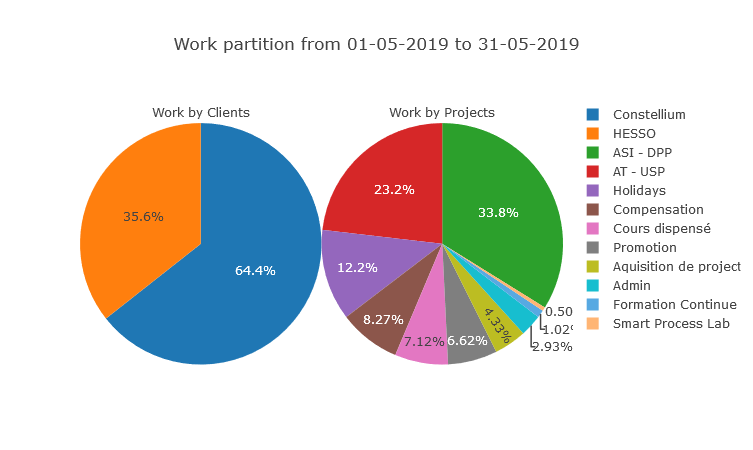

In [624]:
title = "Work by Clients"
labels = filteredTimeEntiresDf['client']
values = filteredTimeEntiresDf['duration']
trace1 = go.Pie(title=title,
                labels=labels,
                values=values,
                hoverinfo='label+percent+value',
                domain=dict(x=[0,0.5]))

title = "Work by Projects"
labels = filteredTimeEntiresDf['project']
values = filteredTimeEntiresDf['duration']
trace2 = go.Pie(title=title,
                labels=labels,
                values=values,
                hoverinfo='label+percent+value',
                domain=dict(x=[0.5,1.0]))

title = "Work partition from {} to {}".format(startdate.strftime('%d-%m-%Y'), enddate.strftime('%d-%m-%Y'))
layout = go.Layout(title=title,
                   #annotations=[ann1,ann2],
                   # Hide legend if you want
                   #showlegend=False
                   )

data = [trace1, trace2]
# Create fig with data and layout
fig = go.Figure(data=data,layout=layout)
ply.offline.iplot(fig, filename='basic_pie_chart')